In [1]:
%load_ext autoreload
%autoreload 2

import sys

module_dir = '../'

if module_dir not in sys.path:
    sys.path.append(module_dir)

import pyqg
from pyqg import diagnostic_tools as tools
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm
from matplotlib.colors import TwoSlopeNorm

# from pyqg_parameterization_benchmarks.src.pyqg_parameterization_benchmarks import coarsening_ops as coarsen

import pyqg_parameterization_benchmarks

from pyqg_parameterization_benchmarks import coarsening_ops as coarsen

Eddy configuration

In [2]:
# Constants
year = 24*60*60*365. # = 31,536,000 = 3.2e7 s therefore 10 years = 3.2e8

# Physical params
L = 1e6 # length of the model domain / m
rd = 1.5e4 # deformation scale / m
rek = 5.787e-7 # linear bottom drag / s^-1
dt = 3600 # time step / s
delta_U_eddy = 0.025 # difference between flows at upper and lower layers / ms^-1
H1 = 500 # thickness of the upper layer / m
delta = 0.25 # ratio of the upper layer thickness to the lower layer thickness (H1/H2)
beta = 1.5e-11 # beta parameter / m^-1s^-1

# Experiment params
n_years_run = 10 # number of years to run the model for
n_years_start_av = 5 # number of years from which to average the data
n_years_snapshots = 1 # number of years between snapshots

base_kwargs = dict(tmax=n_years_run*year, twrite=10000, tavestart=n_years_start_av*year, beta=beta, rd=rd, rek=rek, H1=H1, delta=delta, U1=delta_U_eddy, U2=0, L=L, dt=dt)


In [3]:
high_res_nx = 256
low_res_nx = 64

save = False

generate high-res data

In [4]:
high_res_model = pyqg.QGModel(nx=high_res_nx, **base_kwargs)
high_res_model_gen = high_res_model.run_with_snapshots(tsnapint=int(n_years_snapshots*year))

for snapshot in tqdm(high_res_model_gen):
    high_res_model_ds = high_res_model.to_dataset()[['q', 'u', 'v']]
    high_res_model_ds.to_netcdf(f'../2d_data/eddy_config/highres/eddy_{high_res_nx}_{round(snapshot/year, 4)}years_L={L*1e-6}e6.nc')

    o1 = coarsen.Operator1(high_res_model, low_res_nx)
    o1_coarsened = o1.coarsen(high_res_model.q)[1] # [1] selects the upper level

    o2 = coarsen.Operator2(high_res_model, low_res_nx)
    o2_coarsened = o2.coarsen(high_res_model.q)[1] # [1] selects the upper level

    o3 = coarsen.Operator3(high_res_model, low_res_nx)
    o3_coarsened = o3.coarsen(high_res_model.q)[1] # [1] selects the upper level

    if save:
        np.savetxt(f'../2d_data/eddy_config/coarsened/eddy_{high_res_nx}_q_operator1_{round(snapshot/year, 4)}years_L={L*1e-6}e6.csv', o1_coarsened, delimiter=",")
        np.savetxt(f'../2d_data/eddy_config/coarsened/eddy_{high_res_nx}_q_operator2_{round(snapshot/year, 4)}years_L={L*1e-6}e6.csv', o2_coarsened, delimiter=",")
        np.savetxt(f'../2d_data/eddy_config/coarsened/eddy_{high_res_nx}_q_operator3_{round(snapshot/year, 4)}years_L={L*1e-6}e6.csv', o3_coarsened, delimiter=",")

INFO:  Logger initialized
0it [00:00, ?it/s]INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
1it [01:16, 76.14s/it]INFO: Step: 10000, Time: 3.60e+07, KE: 2.44e-06, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
2it [02:30, 74.93s/it]INFO: Step: 20000, Time: 7.20e+07, KE: 3.61e-04, CFL: 0.159
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
3it [03:43, 74.03s/it]INFO: Step: 30000, Time: 1.08e+08, KE: 5.74e-04, CFL: 0.192
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
4it [04:59, 74.78s/it]INFO: Step: 40000, Time: 1.44e+08, KE: 6.14e-04, CFL: 0.239
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
5it [06:14, 75.02s/it]INFO: Step: 50000, Time: 1.80e+08, KE: 5.45e-04, CFL: 0.181
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
6it [07:38, 78.21s/it]INFO: Step: 60000, Time: 2.16e+08, KE: 6.79e-04, CFL: 0.

generate low-res data

In [12]:
low_res_model = pyqg.QGModel(nx=low_res_nx, **base_kwargs)
low_res_model_gen = low_res_model.run_with_snapshots(tsnapint=int(n_years_snapshots*year))

for snapshot in tqdm(low_res_model_gen):
    low_res_model_ds = low_res_model.to_dataset()[['q', 'u', 'v']]
    if save:
        low_res_model_ds.to_netcdf(f'../2d_data/eddy_config/lowres/eddy_{low_res_nx}_{round(snapshot/year, 4)}years_L={L*1e-6}e6.nc')

print(low_res_model)

INFO:  Logger initialized
1it [00:04,  4.03s/it]INFO: Step: 10000, Time: 3.60e+07, KE: 1.49e-05, CFL: 0.007
2it [00:08,  4.02s/it]INFO: Step: 20000, Time: 7.20e+07, KE: 2.71e-04, CFL: 0.037
3it [00:12,  4.02s/it]INFO: Step: 30000, Time: 1.08e+08, KE: 4.55e-04, CFL: 0.044
4it [00:16,  4.04s/it]INFO: Step: 40000, Time: 1.44e+08, KE: 4.63e-04, CFL: 0.043
5it [00:20,  4.02s/it]INFO: Step: 50000, Time: 1.80e+08, KE: 4.66e-04, CFL: 0.053
6it [00:25,  4.44s/it]INFO: Step: 60000, Time: 2.16e+08, KE: 5.17e-04, CFL: 0.047
7it [00:30,  4.70s/it]INFO: Step: 70000, Time: 2.52e+08, KE: 4.85e-04, CFL: 0.047
9it [00:40,  4.89s/it]INFO: Step: 80000, Time: 2.88e+08, KE: 5.05e-04, CFL: 0.047
10it [00:45,  4.58s/it]

In [13]:
dir(low_res_model)

['F1',
 'F2',
 'H',
 'Hi',
 'Jptpc',
 'Jpxi',
 'Jq',
 'L',
 'M',
 'Qy',
 'Qy1',
 'Qy2',
 'S',
 'Sph',
 'U',
 'U1',
 'U2',
 'Ubg',
 'Vbg',
 'W',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_advect',
 '_calc_cfl',
 '_calc_derived_fields',
 '_calc_diagnostics',
 '_calc_eddy_time',
 '_calc_ke',
 '_calc_parameterization_contribution',
 '_calc_parameterization_spectrum',
 '_calc_paramspec_contribution',
 '_do_advection',
 '_do_external_forcing',
 '_do_friction',
 '_do_q_subgrid_parameterization',
 '_do_uv_subgrid_parameterization',
 '_empty_com',
 '_empty_real',
 '_filter',
 '_forward_timestep',
 '_ik',
 '_ikQy',
 '_il',
 '_increment_

define the coarsener

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized


(2, 256, 256)


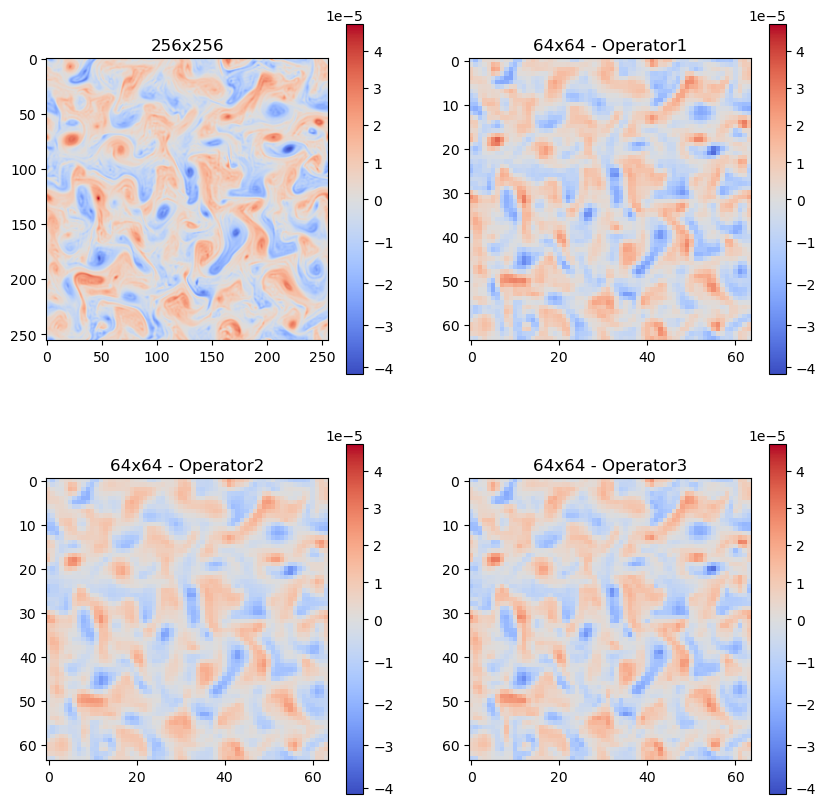

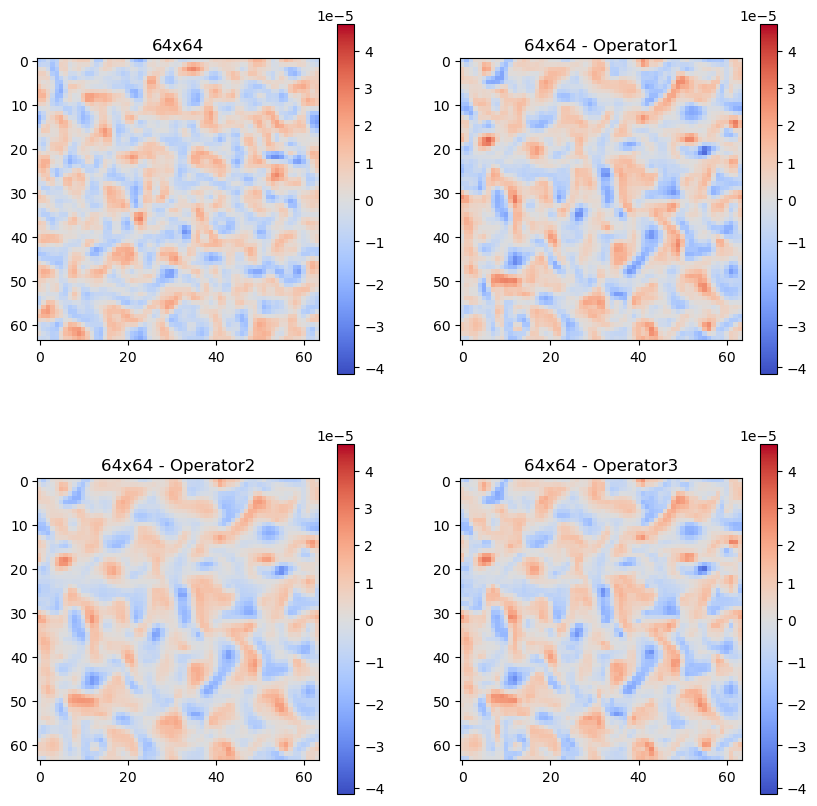

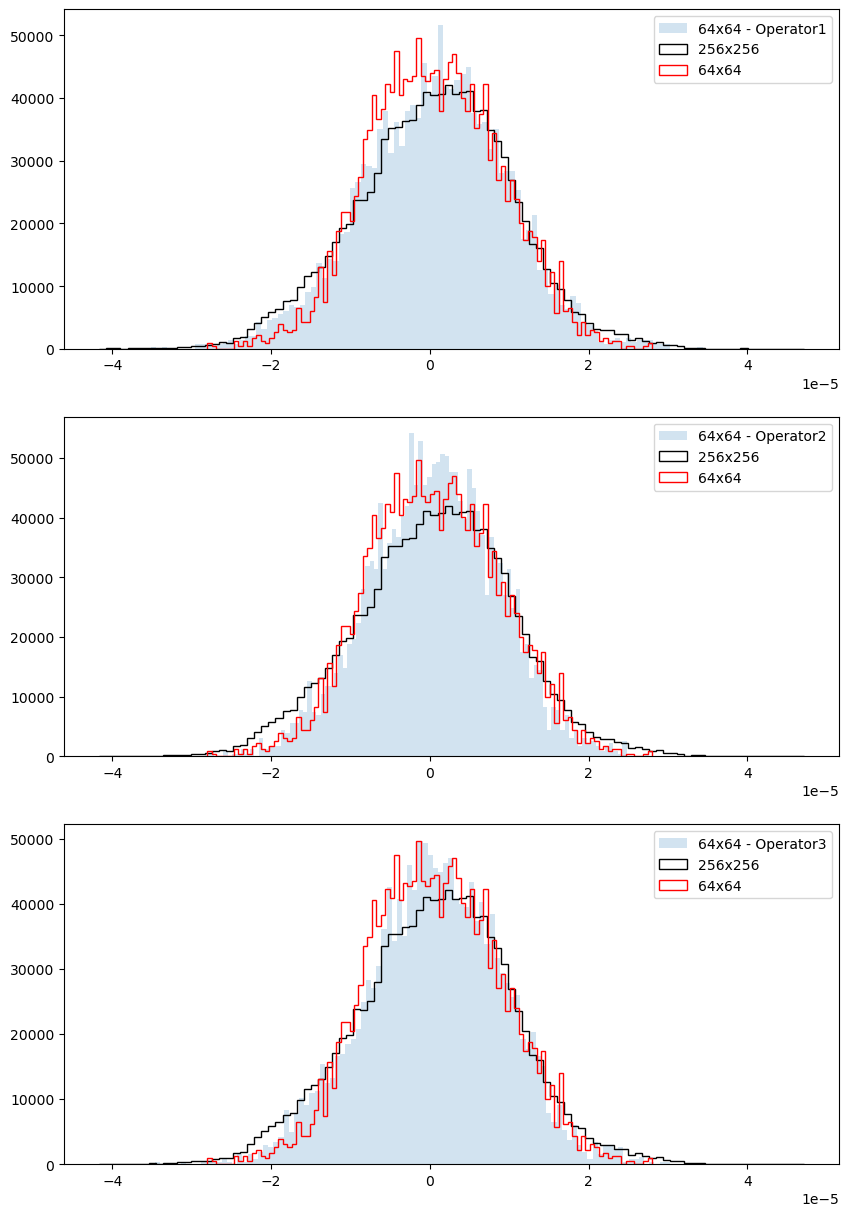

In [11]:
coarsener_list = [coarsen.Operator1(high_res_model, low_res_nx), coarsen.Operator2(high_res_model, low_res_nx), coarsen.Operator3(high_res_model, low_res_nx)]

level = 1

cmap = 'coolwarm'
norm = TwoSlopeNorm(vcenter=0)

# plot the final state of the two runs
print(high_res_model.q.shape)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
im0 = ax[0].imshow(high_res_model.q[level-1], norm=norm, cmap=cmap)
fig.colorbar(im0, ax=ax[0])
ax[0].set_title(f'{high_res_nx}x{high_res_nx}')
for i, coarsener in enumerate(coarsener_list):
    imi = ax[i+1].imshow(coarsener.coarsen(high_res_model.q)[level-1], norm=norm, cmap=cmap)
    fig.colorbar(imi, ax=ax[i+1])
    ax[i+1].set_title(f'{low_res_nx}x{low_res_nx} - Operator{i+1}')
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
im0 = ax[0].imshow(low_res_model.q[level-1], norm=norm, cmap=cmap)
fig.colorbar(im0, ax=ax[0])
ax[0].set_title(f'{low_res_nx}x{low_res_nx}')
for i, coarsener in enumerate(coarsener_list):
    imi = ax[i+1].imshow(coarsener.coarsen(high_res_model.q)[level-1], norm=norm, cmap=cmap)
    fig.colorbar(imi, ax=ax[i+1])
    ax[i+1].set_title(f'{low_res_nx}x{low_res_nx} - Operator{i+1}')
plt.show()

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax = ax.flatten()
for i, coarsener in enumerate(coarsener_list):
    ax[i].hist(coarsener.coarsen(high_res_model.q)[0].flatten(), bins=100, alpha=0.2, label=f'{low_res_nx}x{low_res_nx} - Operator{i+1}', density=True)
    ax[i].hist(high_res_model.q[0].flatten(), bins=100, alpha=1, label=f'{high_res_nx}x{high_res_nx}', density=True, histtype='step', color='black')
    ax[i].hist(low_res_model.q[0].flatten(), bins=100, alpha=1, label=f'{low_res_nx}x{low_res_nx}', density=True, histtype='step', color='red')
    ax[i].legend()
plt.show()

stack high-res and low-res files

In [36]:
low_res_files = !ls ../2d_data/eddy_config/lowres/eddy_64_*years_L=1.0e6.nc
low_res_files = [f'{file}' for file in low_res_files[-1000:]]
low_res_data = xr.open_mfdataset(low_res_files)
print('done low-res')

high_res_files = !ls ../2d_data/eddy_config/highres/eddy_256_*years_L=1.0e6.nc
high_res_files = [f'{file}' for file in high_res_files[-1000:]]
high_res_data = xr.open_mfdataset(high_res_files)
print('done high-res')

o1_files = !ls ../2d_data/eddy_config/coarsened/eddy_256_q_operator1_*years_L=1.0e6.csv
o1_files = [f'{file}' for file in o1_files[-1000:]]
o1_data = []
for file in o1_files:
    o1_data.append(np.genfromtxt(file, delimiter=','))
o1_data = np.array(o1_data)
print('done o1, shape:', o1_data.shape)

o2_files = !ls ../2d_data/eddy_config/coarsened/eddy_256_q_operator2_*years_L=1.0e6.csv
o2_files = [f'{file}' for file in o2_files[-1000:]]
o2_data = []
for file in o2_files:
    o2_data.append(np.genfromtxt(file, delimiter=','))
o2_data = np.array(o2_data)
print('done o2, shape:', o2_data.shape)

o3_files = !ls ../2d_data/eddy_config/coarsened/eddy_256_q_operator3_*years_L=1.0e6.csv
o3_files = [f'{file}' for file in o3_files[-1000:]]
o3_data = []
for file in o3_files:
    o3_data.append(np.genfromtxt(file, delimiter=','))
o3_data = np.array(o3_data)
print('done o3, shape:', o3_data.shape)

done low-res
done high-res
done o1, shape: (1000, 64, 64)
done o2, shape: (1000, 64, 64)
done o3, shape: (1000, 64, 64)


In [37]:
q_low_res = low_res_data.q.sel(lev=2)
q_low_res

<xarray.DataArray 'q' (time: 1000, y: 64, x: 64)>
dask.array<getitem, shape=(1000, 64, 64), dtype=float64, chunksize=(1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
    lev      int32 2
  * time     (time) float64 1.577e+08 1.578e+08 ... 3.151e+08 3.152e+08
Attributes:
    units:      s^-1
    long_name:  potential vorticity in real space

In [42]:
# params
operator = 1
n_train = 500
#####

if operator == 1:
    q_coarsened = o1_data
elif operator == 2:
    q_coarsened = o2_data
elif operator == 3:
    q_coarsened = o3_data

y = q_coarsened.reshape(-1, low_res_nx * low_res_nx)
x = q_low_res.values.reshape(-1, low_res_nx * low_res_nx)

print(x.shape, y.shape)

x_train = x[:n_train]
y_train = y[:n_train]

x_test = x[n_train:]
y_test = y[n_train:]

(1000, 4096) (1000, 4096)
